# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных
Сгенерируем набор данных datasets.make_regression 
Аргументы:
2 признака
1 информативный
1 избыточный
шум
coef = True - возвращает уравнение

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
print data[:5]
print target[:5]

[[-1.13431848 -0.70742089]
 [-0.27617949 -0.51688389]
 [-0.46200535  0.35088849]
 [ 0.36505352  0.77408203]
 [-1.02141473  0.4323957 ]]
[-45.38589148 -10.29545833 -21.47606913  11.96165156 -42.44469577]


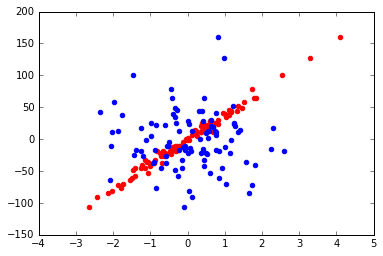

In [9]:
# зависимость между признаками и метками
# 1 признак информативный
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [10]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [12]:
# создали модель
linear_regressor = linear_model.LinearRegression()
# обучили
linear_regressor.fit(train_data, train_labels)
# получили результаты 
predictions = linear_regressor.predict(test_data)

In [13]:
print test_labels

[ -52.37232463   25.7124082    41.1068411   -17.27897399  -16.85466265
  -14.97110322 -105.77758163  160.09441244  -13.26392817   34.35183007
   12.67156468  -27.02798161  -36.69728864   12.74038341  -35.32062686
  -32.92158843  -61.47026695  -71.3715844    44.41658249  -12.0017312
   25.24428409   44.66274342  -16.79027112   20.87713077  -10.29545833
  -45.38589148  -32.71074998   58.26281761   12.42286854   23.87701013]


In [14]:
print predictions

[ -40.56029117   27.80207692   36.11196299  -13.3774896   -16.10240663
  -12.65128764 -101.31607097  155.45812651  -16.29145363   38.60622858
   13.89402939  -24.91968747  -27.17145464    7.2944721   -41.77528818
  -33.80298913  -56.48770545  -70.90714485   43.63795279   -7.19783644
   14.48047003   50.21693283  -14.73795313   13.27385145  -11.0659348
  -43.63939886  -43.33801804   57.13974859    6.48321243   31.06358106]


In [16]:
# используем среднее отклоенение
metrics.mean_absolute_error(test_labels, predictions)

4.4095027500668502

In [17]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [25]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [26]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [32]:
# получение весов признаков сгенерированной модели
coef

array([ 38.07925837,   0.        ])

In [34]:
# получение весов признаков обученной модели
linear_regressor.coef_

array([ 37.90833535,   0.22485619])

In [39]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [40]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

y = 37.91*x1 + 0.22*x2


#### Lasso
Позволяет производить отбор признаков, в котором неинформативные признаки отсеиваются.

In [49]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [50]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [51]:
print lasso_regressor.coef_

[ 37.03994713   0.        ]


In [52]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [53]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.04*x1 + 0.00*x2
